# Load packages and libraries

In [70]:
.libPaths()
.libPaths(new = c("/home/manuel.tardaguila/conda_envs/multiome_QC_DEF/lib/R/library"))
.libPaths()
# sessionInfo()

Sys.setenv(RETICULATE_PYTHON="/home/manuel.tardaguila/conda_envs/multiome_QC_DEF/bin/python")
library(reticulate)
reticulate::use_python("/home/manuel.tardaguila/conda_envs/multiome_QC_DEF/bin/python")
reticulate::use_condaenv("/home/manuel.tardaguila/conda_envs/multiome_QC_DEF")
reticulate::py_module_available(module='leidenalg')
reticulate::import('leidenalg')
suppressMessages(library("optparse"))
suppressMessages(library(hdf5r))
suppressMessages(library(Seurat))
suppressMessages(library(Signac))
suppressMessages(library(EnsDb.Hsapiens.v86))
suppressMessages(library(dplyr))
suppressMessages(library(ggplot2))
suppressMessages(library(Matrix))
suppressMessages(library(data.table))
suppressMessages(library(ggpubr))
suppressMessages(library(ggplot2))
suppressMessages(library(scDblFinder))
suppressMessages(library("tidyr"))
suppressMessages(library("tibble"))
suppressMessages(library("biovizBase"))
suppressMessages(library("patchwork"))
suppressMessages(library(glmGamPoi))
suppressMessages(library(svglite))
suppressMessages(library(RColorBrewer))
suppressMessages(library(forcats))
suppressMessages(library(cowplot))
suppressMessages(library('ggeasy'))
suppressMessages(library("ggnewscale"))

[1] "/home/manuel.tardaguila/conda_envs/multiome_QC_DEF/lib/R/library"

[1] "/home/manuel.tardaguila/conda_envs/multiome_QC_DEF/lib/R/library"

[1] TRUE

Module(leidenalg)

Warning message:
"package 'ggnewscale' was built under R version 4.3.3"


## Read the merged object filtered for doublets and clusterized at high resolution

In [2]:
setwd("/group/soranzo/manuel.tardaguila/2025_K562_multiome_reanalysis/processing_outputs/")

In [3]:
adata<-readRDS(file="merged_clusters_final_annotated.rds")

## Check initial metadata

In [4]:
metadata<-adata[[]]

In [5]:
cat("metadata_0\n")
cat(str(metadata))
cat("\n")
cat(str(row.names(metadata)))
cat("\n")


metadata_0
'data.frame':	9422 obs. of  69 variables:
 $ orig.ident                       : chr  "MCO_1278" "MCO_1278" "MCO_1278" "MCO_1278" ...
 $ nCount_RNA                       : num  12949 15084 13407 18286 16969 ...
 $ nFeature_RNA                     : int  5247 5165 5318 5778 5275 5347 4298 4962 3294 5976 ...
 $ percent.mt                       : num  0.185 0.239 0.38 0.142 0.471 ...
 $ nCount_RNA_raw                   : num  13634 15733 14194 18931 17515 ...
 $ nFeature_RNA_raw                 : int  5311 5170 5417 5791 5277 5363 4452 4962 3717 5977 ...
 $ nCount_ATAC                      : num  138644 216904 6348 50680 42748 ...
 $ nFeature_ATAC                    : int  30057 43669 1591 11923 10007 23187 23928 32338 25029 12005 ...
 $ gex_raw_reads                    : int  37384 40431 34370 51406 47267 45131 30719 35940 17911 53406 ...
 $ gex_mapped_reads                 : int  36228 39307 33349 49706 45795 43781 29814 34824 17333 51826 ...
 $ gex_conf_intergenic_reads      

## Define sample ID

In [6]:
adata$sample_id<-droplevels(interaction(adata$time_point, adata$clone_line, sep="__", lex.order=TRUE))

cat(sprintf(as.character(names(summary(adata$sample_id)))))
cat("\n")
cat(sprintf(as.character(summary(adata$sample_id))))
cat("\n")

24_hours__wt_1 24_hours__wt_2 24_hours__wt_3 24_hours__rs139141690_HET_1 24_hours__rs139141690_1 24_hours__rs139141690_2 24_hours__rs139141690_3 24_hours__Del_16bp_1 24_hours__Del_80bp_1 24_hours__Del_80bp_2 24_hours__Del_80bp_3 48_hours__wt_1 48_hours__wt_2 48_hours__wt_3 48_hours__rs139141690_HET_1 48_hours__rs139141690_1 48_hours__rs139141690_2 48_hours__rs139141690_3 48_hours__Del_16bp_1 48_hours__Del_80bp_1 48_hours__Del_80bp_2 48_hours__Del_80bp_3 72_hours__wt_1 72_hours__wt_2 72_hours__wt_3 72_hours__rs139141690_HET_1 72_hours__rs139141690_1 72_hours__rs139141690_2 72_hours__rs139141690_3 72_hours__Del_16bp_1 72_hours__Del_80bp_1 72_hours__Del_80bp_2 72_hours__Del_80bp_3 96_hours__wt_1 96_hours__wt_2 96_hours__wt_3 96_hours__rs139141690_HET_1 96_hours__rs139141690_1 96_hours__rs139141690_2 96_hours__rs139141690_3 96_hours__Del_16bp_1 96_hours__Del_80bp_1 96_hours__Del_80bp_2 96_hours__Del_80bp_3
27 135 59 224 41 38 5 436 210 71 115 56 189 135 484 151 119 14 282 161 93 107 146 71

## Order alphanumerically the Seurat clusters 

In [7]:
adata$seurat_clusters<-factor(adata$seurat_clusters,
                                                   levels=as.character(seq(1,max(as.numeric(adata$seurat_clusters)),by=1)),
                                                   ordered=T)
cat("seurat_clusters\n")
cat(sprintf(as.character(names(summary(adata$seurat_clusters)))))
cat("\n")
cat(sprintf(as.character(summary(adata$seurat_clusters))))
cat("\n")

seurat_clusters
1 2 3 4 5 6 7 8 9 10 11 12
2135 1462 1102 958 940 851 740 421 348 341 97 27


# Graphs of figures

In [8]:
 path_graphs = paste("/group/soranzo/manuel.tardaguila/2025_K562_multiome_reanalysis/processing_outputs/",'Figure_graphs','/',sep='')
  
  if (file.exists(path_graphs)){
    
    
  }else{
    
    dir.create(file.path(path_graphs))
    
  }#path_processing_outputs

NULL

## Figure 5 panel B UMAP

Warning message:
"The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead."


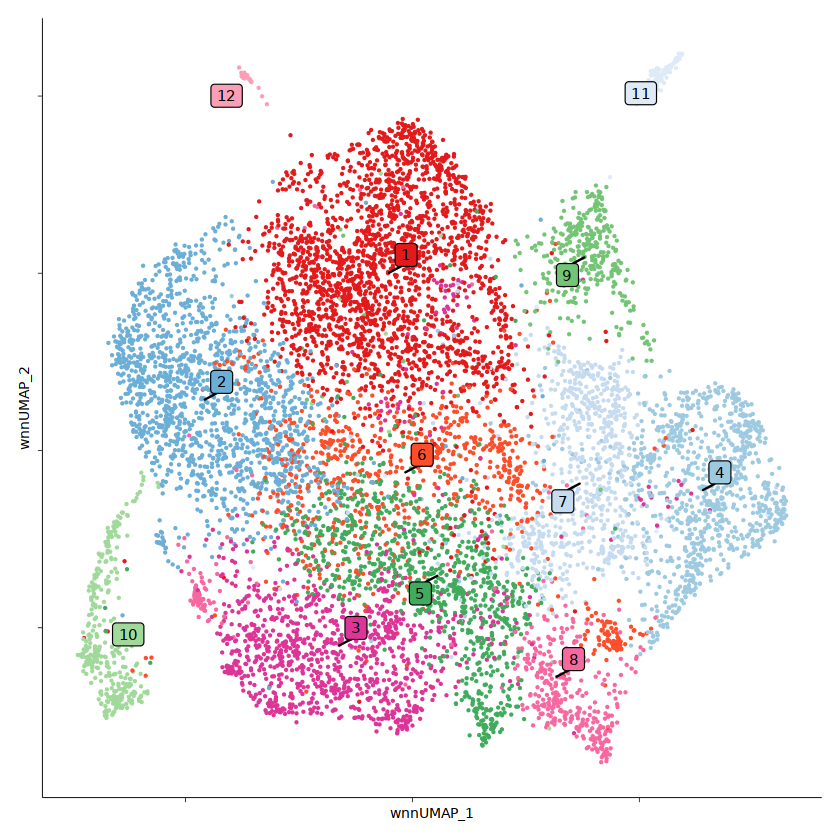

In [9]:
Idents(adata) = 'seurat_clusters'
  
  
  p2 = DimPlot(object = adata, reduction ='umap.wnn' ,label = TRUE,
               cols=c(brewer.pal(9, "YlOrRd")[c(7)],
                      brewer.pal(9, "Blues")[c(5)],
                      brewer.pal(9, "RdPu")[c(6)],
                      brewer.pal(9, "Blues")[c(4)],
                      brewer.pal(9, "Greens")[c(6)],
                      brewer.pal(9, "YlOrRd")[c(6)],
                      brewer.pal(9, "Blues")[c(3)],
                      brewer.pal(9, "RdPu")[c(5)],
                      brewer.pal(9, "Greens")[c(5)],
                      brewer.pal(9, "Greens")[c(4)],
                      brewer.pal(9, "Blues")[c(2)],
                      brewer.pal(9, "RdPu")[c(4)],
                      brewer.pal(9, "RdPu")[c(3)]),
               label.size = 3,
               label.color = "black",
               label.box = TRUE,
               repel=TRUE)+
    theme_classic()+
    theme(axis.title.y=element_text(size=8, color="black", family="sans"),
          axis.title.x=element_text(size=8, color="black", family="sans"),
          axis.text.y=element_blank(),
          axis.text.x=element_blank(),
          axis.line.x = element_line(size = 0.2),
          axis.ticks.x = element_line(size = 0.2),
          axis.ticks.y = element_line(size = 0.2),
          axis.line.y = element_line(size = 0.2))+
    theme(legend.title =element_blank(),
          legend.text = element_text(size=6, color="black", family="sans"),
          legend.key.size = unit(0.45, 'cm'), #change legend key size
          legend.key.height = unit(0.45, 'cm'), #change legend key height
          legend.key.width = unit(0.45, 'cm'), #change legend key width
          legend.position="none")+        
    ggeasy::easy_center_title()

p2

In [10]:
setwd(path_graphs)
  
svgname<-paste(paste("Panel_5_B_wnn_","clusters", sep='_'),".svg",sep='')
svglite(svgname, width = 3, height = 3)
print(p2)
dev.off()

png 
  2

## Figure 5 panel B stacked barplot

In [11]:
met<-adata[[]]

In [12]:
colnames(met)

[1] "orig.ident"                        "nCount_RNA"                       
 [3] "nFeature_RNA"                      "percent.mt"                       
 [5] "nCount_RNA_raw"                    "nFeature_RNA_raw"                 
 [7] "nCount_ATAC"                       "nFeature_ATAC"                    
 [9] "gex_raw_reads"                     "gex_mapped_reads"                 
[11] "gex_conf_intergenic_reads"         "gex_conf_exonic_reads"            
[13] "gex_conf_intronic_reads"           "gex_conf_exonic_unique_reads"     
[15] "gex_conf_exonic_antisense_reads"   "gex_conf_exonic_dup_reads"        
[17] "gex_exonic_umis"                   "gex_conf_intronic_unique_reads"   
[19] "gex_conf_intronic_antisense_reads" "gex_conf_intronic_dup_reads"      
[21] "gex_intronic_umis"                 "gex_conf_txomic_unique_reads"     
[23] "gex_umis_count"                    "gex_genes_count"                  
[25] "atac_raw_reads"                    "atac_unmapped_reads"              
[27] "atac_lowmapq"                      "atac_dup_reads"                   
[29] "atac_chimeric_reads"               "atac_mitochondrial_reads"         
[31] "atac_fragments"                    "atac_TSS_fragments"               
[33] "atac_peak_region_fragments"        "atac_peak_region_cutsites"        
[35] "TSS.enrichment"                    "TSS.percentile"                   
[37] "scDblFinder.class"                 "scDblFinder.score"                
[39] "scDblFinder.weighted"              "scDblFinder.cxds_score"           
[41] "scDblFinder.class_atac"            "scDblFinder.score_atac"           
[43] "scDblFinder.weighted_atac"         "scDblFinder.cxds_score_atac"      
[45] "DBL_comb"                          "amulet_nFrags"                    
[47] "amulet_uniqFrags"                  "amulet_nAbove2"                   
[49] "amulet_total.nAbove2"              "amulet_p.value"                   
[51] "amulet_q.value"                    "doublet_amulet"                   
[53] "Diff"                              "doublet"                          
[55] "nCount_SCT"                        "nFeature_SCT"                     
[57] "SCT.weight"                        "ATAC.weight"                      
[59] "wsnn_res.2"                        "seurat_clusters"                  
[61] "wsnn_res.0.5"                      "Assignation_GEX_not_amplified"    
[63] "time_point"                        "nCount_ATAC_by_seurat_clusters"   
[65] "nFeature_ATAC_by_seurat_clusters"  "clone_line"                       
[67] "Genotype"                          "seurat_clusters_by_diff_groups"   
[69] "celltype"                          "sample_id"

In [13]:
met.dt<-data.table(met,key=c("Genotype","seurat_clusters",'time_point'))

In [14]:
#str(met.dt)

In [15]:
Freq.table<-as.data.frame(met.dt[,.(Freq=.N),by=key(met.dt)], stringsAsFactors=F)
#Freq.table

In [16]:
met.dt<-data.table(met, key=c("Genotype",'time_point'))
Freq.TOTAL<-as.data.frame(met.dt[,.(TOTAL=.N),by=key(met.dt)], stringsAsFactors=F)
#Freq.TOTAL

In [17]:
Freq.table<-merge(Freq.table,
                  Freq.TOTAL,
                  by=c("Genotype",'time_point'))
Freq.table$Perc<-round((100*(Freq.table$Freq/Freq.table$TOTAL)),2)

#Freq.table

In [18]:
str(Freq.table)

'data.frame':	229 obs. of  6 variables:
 $ Genotype       : Ord.factor w/ 5 levels "wt"<"rs139141690_HET"<..: 4 4 4 4 4 4 4 4 4 4 ...
 $ time_point     : Ord.factor w/ 4 levels "24_hours"<"48_hours"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ seurat_clusters: Ord.factor w/ 12 levels "1"<"2"<"3"<"4"<..: 1 11 8 5 2 9 6 3 10 7 ...
 $ Freq           : int  18 8 9 7 23 36 44 44 2 85 ...
 $ TOTAL          : int  436 436 436 436 436 436 436 436 436 436 ...
 $ Perc           : num  4.13 1.83 2.06 1.61 5.28 ...


In [19]:
summary(Freq.table$TOTAL)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   84.0   282.0   436.0   476.3   624.0  1325.0 

In [20]:
met.dt<-data.table(met, key=c("Genotype"))
Freq.table_CT_annotation<-as.data.frame(met.dt[,.(Freq_genotypes=.N),by=key(met.dt)], stringsAsFactors=F)



In [21]:
str(Freq.table_CT_annotation)

'data.frame':	5 obs. of  2 variables:
 $ Genotype      : Ord.factor w/ 5 levels "wt"<"rs139141690_HET"<..: 1 2 3 4 5
 $ Freq_genotypes: int  2572 1600 1076 1937 2237


In [22]:
Freq.table<-merge(Freq.table,
                  Freq.table_CT_annotation,
                  by=c("Genotype"))

### Filter x axis by frequency

In [23]:
Freq.table_filtered<-Freq.table#[which(Freq.table$TOTAL >= 100),]


str(Freq.table_filtered)

'data.frame':	229 obs. of  7 variables:
 $ Genotype       : Ord.factor w/ 5 levels "wt"<"rs139141690_HET"<..: 4 4 4 4 4 4 4 4 4 4 ...
 $ time_point     : Ord.factor w/ 4 levels "24_hours"<"48_hours"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ seurat_clusters: Ord.factor w/ 12 levels "1"<"2"<"3"<"4"<..: 1 11 8 5 2 9 6 3 10 7 ...
 $ Freq           : int  18 8 9 7 23 36 44 44 2 85 ...
 $ TOTAL          : int  436 436 436 436 436 436 436 436 436 436 ...
 $ Perc           : num  4.13 1.83 2.06 1.61 5.28 ...
 $ Freq_genotypes : int  1937 1937 1937 1937 1937 1937 1937 1937 1937 1937 ...


In [24]:
  ### Do the stacked barplot 

  vector_colors_seurat_clusters<-c(brewer.pal(9, "YlOrRd")[c(7)],
    brewer.pal(9, "Blues")[c(5)],
    brewer.pal(9, "RdPu")[c(6)],
    brewer.pal(9, "Blues")[c(4)],
    brewer.pal(9, "Greens")[c(6)],
    brewer.pal(9, "YlOrRd")[c(6)],
    brewer.pal(9, "Blues")[c(3)],
    brewer.pal(9, "RdPu")[c(5)],
    brewer.pal(9, "Greens")[c(5)],
    brewer.pal(9, "Greens")[c(4)],
    brewer.pal(9, "Blues")[c(2)],
    brewer.pal(9, "RdPu")[c(4)],
    brewer.pal(9, "RdPu")[c(3)])
  
  cat("vector_colors_seurat_clusters_0\n")
  cat(str(vector_colors_seurat_clusters))
  cat("\n")

vector_colors_seurat_clusters_0
 chr [1:13] "#E31A1C" "#6BAED6" "#DD3497" "#9ECAE1" "#41AB5D" "#FC4E2A" ...



-------------------------------------->	0 25 50 75 100


Warning message:
"The `size` argument of `element_rect()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead."


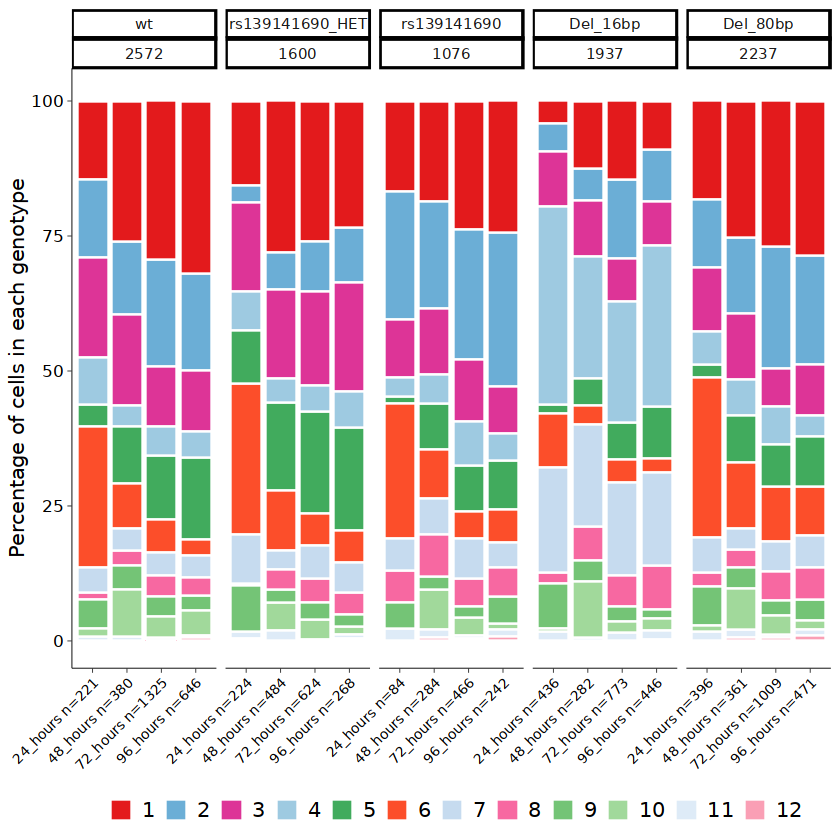

In [25]:
 #### Stacked Graph ---------------
  
  breaks.Rank<-(seq(0,100,by=25))
  labels.Rank<-as.character(breaks.Rank)
  
  cat("-------------------------------------->\t")
  cat(sprintf(as.character(labels.Rank)))
  cat("\n")
  
  
  stacked_barplot<- Freq.table_filtered %>%
     mutate(myaxis = paste0(time_point," ","n=", TOTAL), drop=T) %>%
     mutate(myaxis=fct_reorder(myaxis,as.numeric(time_point)), drop=T) %>%
        ggplot(aes(x=myaxis, y=Perc, fill=seurat_clusters)) +
    geom_bar(stat="identity",colour='white')+
    scale_y_continuous(name=paste("Percentage of cells in each genotype",sep=" "),breaks=breaks.Rank,labels=labels.Rank,
                       limits=c(breaks.Rank[1],breaks.Rank[length(breaks.Rank)]+1))+
    scale_fill_manual(values=vector_colors_seurat_clusters,
                      drop=F,
                      name="Alsinet model")

stacked_barplot<-stacked_barplot+
    theme_cowplot(font_size = 2)+
    facet_grid(. ~ Genotype+Freq_genotypes, scales='free_x', space='free_x', switch="y")+   
    scale_x_discrete(name="Seurat clusters", drop=TRUE)+
    theme( strip.background = element_blank(),
           strip.placement = "outside",
           strip.text = element_text(size=12),
           panel.spacing = unit(0.2, "lines"),
           panel.background=element_rect(fill="white"),
           panel.border=element_rect(colour="white",size=0,5),
           panel.grid.major = element_blank(),
           panel.grid.minor = element_blank())+
        theme_classic()+
            theme(axis.title.y=element_text(size=12, color="black", family="sans"),
                  axis.title.x=element_blank(),
                  axis.text.y=element_text(angle=0,size=10, color="black", family="sans"),
                  axis.text.x=element_text(angle=45,size=8,vjust=1,hjust=1,color="black", family="sans"),
                  axis.line.x = element_line(size = 0.2),
                  axis.ticks.x = element_line(size = 0.2),
                  axis.ticks.y = element_line(size = 0.2),
                  axis.line.y = element_line(size = 0.2))+
            theme(legend.title = element_blank(),
                  legend.text = element_text(size=12, color="black", family="sans"),
                  legend.key.size = unit(0.5, 'cm'), #change legend key size
                  legend.key.height = unit(0.5, 'cm'), #change legend key height
                  legend.key.width = unit(0.5, 'cm'), #change legend key width
                  legend.position="bottom")+
            guides(fill=guide_legend(nrow=1,byrow=TRUE))



stacked_barplot
  




  

In [26]:
setwd(path_graphs)

svgname<-paste("Panel_5_B_stacked_barplot",".svg",sep='')
makesvg = TRUE

if (makesvg == TRUE)
{
  ggsave(svgname, plot= stacked_barplot,
         device="svg", width =5, height = 5)
  
}

## Figure 5 Panel C Marker genes dotplot

### Define marker_genes

In [27]:
marker_genes<-c('ITGA2B','GYPA','IL33','IL1B','CCR7','FYB1','GP6','HBA2','HBZ','HBQ1','KIF15','STIL','ANAPC7')

### Subset to wt cells

In [28]:
summary(adata@meta.data$Genotype)

wt rs139141690_HET     rs139141690        Del_16bp        Del_80bp 
           2572            1600            1076            1937            2237

In [29]:
adata_WT<-subset(adata, Genotype == "wt")

adata_WT

An object of class Seurat 
870291 features across 2572 samples within 5 assays 
Active assay: SCT (27249 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 4 other assays present: RNA, RNA_raw, ATAC, ATAC_by_seurat_clusters
 5 dimensional reductions calculated: pca, umap.rna, lsi, umap.atac, umap.wnn

### Retrieve the information from the DotPlot function of Seurat for the SCT normalization of the RNA-seq data

In [30]:
Idents(adata_WT) = 'seurat_clusters_by_diff_groups'

Dotplot_object <- DotPlot(object = adata_WT, features = marker_genes, assay="SCT")

# cat("Dotplot_object_0\n")
# cat(str(Dotplot_object))
# cat("\n")

df_dotplot<-as.data.frame(Dotplot_object$data)

cat("df_dotplot_0\n")
cat(str(df_dotplot))
cat("\n")

df_dotplot_0
'data.frame':	156 obs. of  5 variables:
 $ avg.exp       : num  0.5213 0.0106 0.0106 0.0319 0.0851 ...
 $ pct.exp       : num  32.98 1.06 1.06 3.19 6.38 ...
 $ features.plot : Factor w/ 13 levels "ITGA2B","GYPA",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ id            : Factor w/ 12 levels "9","7","5","4",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ avg.exp.scaled: num  -0.748 -0.652 -0.509 -0.446 -0.731 ...



### GENE_CLASS

In [31]:
colnames(df_dotplot)[which(colnames(df_dotplot) == 'features.plot')]<-'Symbol'
colnames(df_dotplot)[which(colnames(df_dotplot) == 'id')]<-'seurat_clusters_by_diff_groups'

cat("df_dotplot_1\n")
cat(str(df_dotplot))
cat("\n")

df_dotplot_1
'data.frame':	156 obs. of  5 variables:
 $ avg.exp                       : num  0.5213 0.0106 0.0106 0.0319 0.0851 ...
 $ pct.exp                       : num  32.98 1.06 1.06 3.19 6.38 ...
 $ Symbol                        : Factor w/ 13 levels "ITGA2B","GYPA",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ seurat_clusters_by_diff_groups: Factor w/ 12 levels "9","7","5","4",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ avg.exp.scaled                : num  -0.748 -0.652 -0.509 -0.446 -0.731 ...



In [32]:
 #### Classify the genes in the broad categories shown in the Figure 6 Panel C
        
    
df_dotplot$GENE_CLASS<-NA

df_dotplot$GENE_CLASS[which(df_dotplot$Symbol%in%c('ITGA2B','GYPA'))]<-'Flow cyt markers'
df_dotplot$GENE_CLASS[which(df_dotplot$Symbol%in%c("IL1B","IL33","CCR7"))]<-'Myeloid leukemia markers'
df_dotplot$GENE_CLASS[which(df_dotplot$Symbol%in%c("GP6","FYB1"))]<-'Megakaryocyte markers'
df_dotplot$GENE_CLASS[which(df_dotplot$Symbol%in%c("HBQ1","HBZ","HBA2"))]<-'Hemoglobin genes'
df_dotplot$GENE_CLASS[which(df_dotplot$Symbol%in%c("ANAPC7","STIL","KIF15"))]<-'Meakaryocyte polyploidization'
df_dotplot$GENE_CLASS[which(df_dotplot$Symbol%in%c("FOXM1","SPI1",'MEIS3','FOSB','JUNB','TCF7L2','CUX1'))]<-'ChIP_TFs'

df_dotplot$GENE_CLASS<-factor(df_dotplot$GENE_CLASS,
                                        levels=c('Meakaryocyte polyploidization','Hemoglobin genes','Megakaryocyte markers','Myeloid leukemia markers','Flow cyt markers','ChIP_TFs'),
                                        ordered=T)

cat("df_dotplot_1\n")
cat(str(df_dotplot))
cat("\n")

df_dotplot$Symbol<-factor(df_dotplot$Symbol,
                              levels=rev(marker_genes),
                              ordered=T)
      
    
  
cat("df_dotplot_2\n")
cat(str(df_dotplot))
cat("\n")



df_dotplot_1
'data.frame':	156 obs. of  6 variables:
 $ avg.exp                       : num  0.5213 0.0106 0.0106 0.0319 0.0851 ...
 $ pct.exp                       : num  32.98 1.06 1.06 3.19 6.38 ...
 $ Symbol                        : Factor w/ 13 levels "ITGA2B","GYPA",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ seurat_clusters_by_diff_groups: Factor w/ 12 levels "9","7","5","4",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ avg.exp.scaled                : num  -0.748 -0.652 -0.509 -0.446 -0.731 ...
 $ GENE_CLASS                    : Ord.factor w/ 6 levels "Meakaryocyte polyploidization"<..: 5 5 4 4 4 3 3 2 2 2 ...

df_dotplot_2
'data.frame':	156 obs. of  6 variables:
 $ avg.exp                       : num  0.5213 0.0106 0.0106 0.0319 0.0851 ...
 $ pct.exp                       : num  32.98 1.06 1.06 3.19 6.38 ...
 $ Symbol                        : Ord.factor w/ 13 levels "ANAPC7"<"STIL"<..: 13 12 11 10 9 8 7 6 5 4 ...
 $ seurat_clusters_by_diff_groups: Factor w/ 12 levels "9","7","5","4",..: 1 1 1 1 1 1 1 1 1

### Dotplot after reordering the seurat clusters

labels_pct.exp
0 25 50 75 100
A_avg.exp
Min. 1st Qu. Median Mean 3rd Qu. Max.
-1.67412742024375 -0.615148867093254 -0.277558422280804 -0.009990185393968 0.432298834342995 2.5
labels_avg.exp
-2.5 -1.2 0 1.2 2.5


Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead."


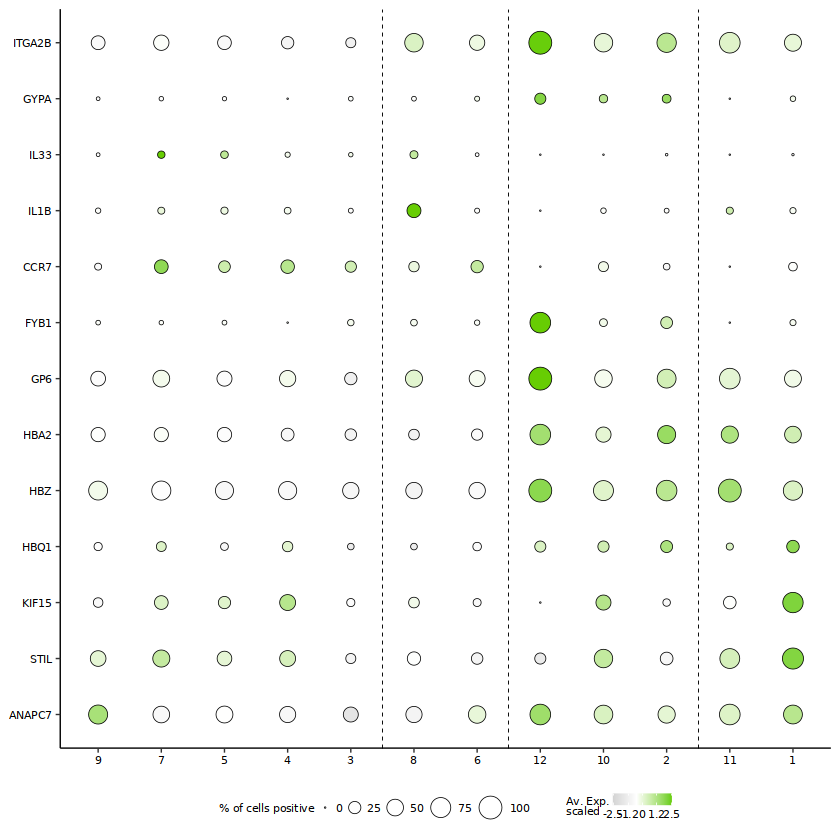

In [33]:
### Define the breaks of percentual expression

breaks_pct.exp<-unique(sort(unique(c(0,seq(0,100, by=25)))))
labels_pct.exp<-as.character(round(breaks_pct.exp,2))

  
cat("labels_pct.exp\n")
cat(sprintf(as.character(labels_pct.exp)))
cat("\n")


### Define the breaks of avg.exp.scaled

indx_avg.exp<-which(colnames(df_dotplot) == 'avg.exp.scaled')

A_avg.exp<-summary(df_dotplot[,indx_avg.exp])



cat("A_avg.exp\n")
cat(sprintf(as.character(names(A_avg.exp))))
cat("\n")
cat(sprintf(as.character(A_avg.exp)))
cat("\n")




max_abs_value<-abs(A_avg.exp[6])
min_abs_value<-abs(A_avg.exp[1])

if(max_abs_value > min_abs_value)
{
  step<-round(abs(max_abs_value--1*max_abs_value)/4,2)
  
  breaks_avg.exp<-unique(sort(round(c(0,max_abs_value,seq(-1*max_abs_value,max_abs_value, by=step)),1)))
  labels_avg.exp<-as.character(breaks_avg.exp)
  
}else{
  
  step<-round(abs(min_abs_value--1*min_abs_value)/4,2)
  
  breaks_avg.exp<-unique(sort(round(c(0,min_abs_value,seq(-1*min_abs_value,min_abs_value, by=step)),1)))
  labels_avg.exp<-as.character(breaks_avg.exp)
  
}# max_abs_value > min_abs_value




cat("labels_avg.exp\n")
cat(sprintf(as.character(labels_avg.exp)))
cat("\n")





Dotplot<-ggplot()+
  geom_point(data=df_dotplot,
             aes(y=Symbol,
                 x=seurat_clusters_by_diff_groups,                       
                 fill=avg.exp.scaled,
                 size=pct.exp),
             stroke=0.25, shape=21,color='black')+
  scale_size(range = c(0,6), name='% of cells positive',
             breaks=breaks_pct.exp, labels=labels_pct.exp, limits=c(breaks_pct.exp[1],breaks_pct.exp[length(breaks_pct.exp)]))+
  scale_fill_gradient2(
    low = "gray", 
    mid = "white", 
    high = "chartreuse3", 
    midpoint = -0.5,
    breaks=breaks_avg.exp,labels=labels_avg.exp,
    limits=c(breaks_avg.exp[1]-0.01,breaks_avg.exp[length(breaks_avg.exp)]+0.01),
    name=paste('Av. Exp.','scaled',sep="\n"),na.value = NA)+       
  scale_x_discrete(name=NULL,drop=F)+
  scale_y_discrete(name=NULL,drop=F)+
  geom_vline(xintercept=c(5.5,7.5,10.5), color="black", linetype='dashed',size=0.2)+
  theme_classic()+
  theme(axis.title=element_blank(),
        axis.title.y=element_blank(),
        axis.title.x=element_blank(),
        axis.text.y=element_text(size=6, color="black", family="sans", face ="italic"),
        axis.text.x=element_text(angle=0,size=6,color="black", family="sans", face ="plain"),
        axis.line.x = element_line(size = 0.3),
        axis.ticks.x = element_line(size = 0.3),
        axis.ticks.y = element_line(size = 0.3),
        axis.line.y = element_line(size = 0.3))+
  theme(legend.title = element_text(size=6),
        legend.text = element_text(size=6),
        legend.key.size = unit(0.25, 'cm'), #change legend key size
        legend.key.height = unit(0.25, 'cm'), #change legend key height
        legend.key.width = unit(0.25, 'cm'), #change legend key width
        legend.position="bottom")+
  ggeasy::easy_center_title()

  

Dotplot

In [34]:
setwd(path_graphs)
    
    
svgname<-paste(paste("Panel_5_C_Dotplot","marker_genes", sep='_'),".svg",sep='')
svglite(svgname, width = 3, height = 6)
print(Dotplot)
dev.off()

png 
  2

# Figure S5 panel D

## Calculate abundancies

In [45]:
met<-adata[[]]

In [46]:
colnames(met)

[1] "orig.ident"                        "nCount_RNA"                       
 [3] "nFeature_RNA"                      "percent.mt"                       
 [5] "nCount_RNA_raw"                    "nFeature_RNA_raw"                 
 [7] "nCount_ATAC"                       "nFeature_ATAC"                    
 [9] "gex_raw_reads"                     "gex_mapped_reads"                 
[11] "gex_conf_intergenic_reads"         "gex_conf_exonic_reads"            
[13] "gex_conf_intronic_reads"           "gex_conf_exonic_unique_reads"     
[15] "gex_conf_exonic_antisense_reads"   "gex_conf_exonic_dup_reads"        
[17] "gex_exonic_umis"                   "gex_conf_intronic_unique_reads"   
[19] "gex_conf_intronic_antisense_reads" "gex_conf_intronic_dup_reads"      
[21] "gex_intronic_umis"                 "gex_conf_txomic_unique_reads"     
[23] "gex_umis_count"                    "gex_genes_count"                  
[25] "atac_raw_reads"                    "atac_unmapped_reads"              
[27] "atac_lowmapq"                      "atac_dup_reads"                   
[29] "atac_chimeric_reads"               "atac_mitochondrial_reads"         
[31] "atac_fragments"                    "atac_TSS_fragments"               
[33] "atac_peak_region_fragments"        "atac_peak_region_cutsites"        
[35] "TSS.enrichment"                    "TSS.percentile"                   
[37] "scDblFinder.class"                 "scDblFinder.score"                
[39] "scDblFinder.weighted"              "scDblFinder.cxds_score"           
[41] "scDblFinder.class_atac"            "scDblFinder.score_atac"           
[43] "scDblFinder.weighted_atac"         "scDblFinder.cxds_score_atac"      
[45] "DBL_comb"                          "amulet_nFrags"                    
[47] "amulet_uniqFrags"                  "amulet_nAbove2"                   
[49] "amulet_total.nAbove2"              "amulet_p.value"                   
[51] "amulet_q.value"                    "doublet_amulet"                   
[53] "Diff"                              "doublet"                          
[55] "nCount_SCT"                        "nFeature_SCT"                     
[57] "SCT.weight"                        "ATAC.weight"                      
[59] "wsnn_res.2"                        "seurat_clusters"                  
[61] "wsnn_res.0.5"                      "Assignation_GEX_not_amplified"    
[63] "time_point"                        "nCount_ATAC_by_seurat_clusters"   
[65] "nFeature_ATAC_by_seurat_clusters"  "clone_line"                       
[67] "Genotype"                          "seurat_clusters_by_diff_groups"   
[69] "celltype"                          "sample_id"

In [50]:
met.dt<-data.table(met,key=c("Genotype","clone_line","seurat_clusters",'time_point'))

In [51]:
#str(met.dt)

In [52]:
Freq.table<-as.data.frame(met.dt[,.(Freq=.N),by=key(met.dt)], stringsAsFactors=F)
#Freq.table

In [53]:
met.dt<-data.table(met, key=c("Genotype","clone_line",'time_point'))
Freq.TOTAL<-as.data.frame(met.dt[,.(TOTAL=.N),by=key(met.dt)], stringsAsFactors=F)
#Freq.TOTAL

In [54]:
Freq.table<-merge(Freq.table,
                  Freq.TOTAL,
                  by=c("Genotype","clone_line",'time_point'))
Freq.table$Perc<-round((100*(Freq.table$Freq/Freq.table$TOTAL)),2)

#Freq.table

In [55]:
str(Freq.table)

'data.frame':	463 obs. of  7 variables:
 $ Genotype       : Ord.factor w/ 5 levels "wt"<"rs139141690_HET"<..: 4 4 4 4 4 4 4 4 4 4 ...
 $ clone_line     : Ord.factor w/ 11 levels "wt_1"<"wt_2"<..: 8 8 8 8 8 8 8 8 8 8 ...
 $ time_point     : Ord.factor w/ 4 levels "24_hours"<"48_hours"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ seurat_clusters: Ord.factor w/ 12 levels "1"<"2"<"3"<"4"<..: 1 11 8 5 2 9 6 3 10 7 ...
 $ Freq           : int  18 8 9 7 23 36 44 44 2 85 ...
 $ TOTAL          : int  436 436 436 436 436 436 436 436 436 436 ...
 $ Perc           : num  4.13 1.83 2.06 1.61 5.28 ...


In [56]:
summary(Freq.table$TOTAL)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    5.0   107.0   161.0   228.4   287.0   773.0 

## read selected clusters and genotypes

In [72]:
#### READ and transform selected_Seurat_clusters ----
  
selected_Seurat_clusters = unlist(strsplit('1,2,6', split=","))

cat("selected_Seurat_clusters\n")
cat(sprintf(as.character(selected_Seurat_clusters)))
cat("\n")

#### READ and transform selected_Genotypes ----

selected_Genotypes = unlist(strsplit('wt,rs139141690,Del_80bp', split=","))

cat("selected_Genotypes\n")
cat(sprintf(as.character(selected_Genotypes)))
cat("\n")

selected_Seurat_clusters
1 2 6
selected_Genotypes
wt rs139141690 Del_80bp


In [73]:
str(Freq.table)
cat("\n")

'data.frame':	463 obs. of  7 variables:
 $ Genotype       : Ord.factor w/ 5 levels "wt"<"rs139141690_HET"<..: 4 4 4 4 4 4 4 4 4 4 ...
 $ clone_line     : Ord.factor w/ 11 levels "wt_1"<"wt_2"<..: 8 8 8 8 8 8 8 8 8 8 ...
 $ time_point     : Ord.factor w/ 4 levels "24_hours"<"48_hours"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ seurat_clusters: Ord.factor w/ 12 levels "1"<"2"<"3"<"4"<..: 1 11 8 5 2 9 6 3 10 7 ...
 $ Freq           : int  18 8 9 7 23 36 44 44 2 85 ...
 $ TOTAL          : int  436 436 436 436 436 436 436 436 436 436 ...
 $ Perc           : num  4.13 1.83 2.06 1.61 5.28 ...



## Subset abundancies table

In [74]:
Seurat_cluster_abundancies_subset<-droplevels(Freq.table[which(Freq.table$seurat_clusters%in%selected_Seurat_clusters &
                                                                    Freq.table$Genotype%in%selected_Genotypes),])


cat("Seurat_cluster_abundancies_subset_0\n")
cat(str(Seurat_cluster_abundancies_subset))
cat("\n")

Seurat_cluster_abundancies_subset_0
'data.frame':	107 obs. of  7 variables:
 $ Genotype       : Ord.factor w/ 3 levels "wt"<"rs139141690"<..: 3 3 3 3 3 3 3 3 3 3 ...
 $ clone_line     : Ord.factor w/ 9 levels "wt_1"<"wt_2"<..: 7 7 7 7 7 7 7 7 7 7 ...
 $ time_point     : Ord.factor w/ 4 levels "24_hours"<"48_hours"<..: 1 1 1 2 2 2 3 3 3 4 ...
 $ seurat_clusters: Ord.factor w/ 3 levels "1"<"2"<"6": 1 2 3 2 1 3 2 3 1 2 ...
 $ Freq           : int  37 11 79 11 47 34 57 68 116 26 ...
 $ TOTAL          : int  210 210 210 161 161 161 397 397 397 202 ...
 $ Perc           : num  17.62 5.24 37.62 6.83 29.19 ...



In [75]:
head(Seurat_cluster_abundancies_subset[which(Seurat_cluster_abundancies_subset$seurat_clusters == '1'),])

,Genotype,clone_line,time_point,seurat_clusters,Freq,TOTAL,Perc
,<ord>,<ord>,<ord>,<ord>,<int>,<int>,<dbl>
46,Del_80bp,Del_80bp_1,24_hours,1,37,210,17.62
60,Del_80bp,Del_80bp_1,48_hours,1,47,161,29.19
74,Del_80bp,Del_80bp_1,72_hours,1,116,397,29.22
88,Del_80bp,Del_80bp_1,96_hours,1,62,202,30.69
90,Del_80bp,Del_80bp_2,24_hours,1,11,71,15.49
102,Del_80bp,Del_80bp_2,48_hours,1,14,93,15.05


## Calculate mean and sem

In [79]:
Seurat_cluster_abundancies_subset.dt<-data.table(Seurat_cluster_abundancies_subset, key=c('time_point','seurat_clusters','Genotype'))


cat("Seurat_cluster_abundancies_subset.dt_0\n")
cat(str(Seurat_cluster_abundancies_subset.dt))
cat("\n")


Seurat_cluster_abundancies_subset.dt_0
Classes 'data.table' and 'data.frame':	107 obs. of  7 variables:
 $ Genotype       : Ord.factor w/ 3 levels "wt"<"rs139141690"<..: 1 1 1 2 2 2 3 3 3 1 ...
 $ clone_line     : Ord.factor w/ 9 levels "wt_1"<"wt_2"<..: 1 2 3 4 5 6 7 8 9 1 ...
 $ time_point     : Ord.factor w/ 4 levels "24_hours"<"48_hours"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ seurat_clusters: Ord.factor w/ 3 levels "1"<"2"<"6": 1 1 1 1 1 1 1 1 1 2 ...
 $ Freq           : int  1 23 8 4 7 3 37 11 24 2 ...
 $ TOTAL          : int  27 135 59 41 38 5 210 71 115 27 ...
 $ Perc           : num  3.7 17.04 13.56 9.76 18.42 ...
 - attr(*, ".internal.selfref")=<externalptr> 
 - attr(*, "sorted")= chr [1:3] "time_point" "seurat_clusters" "Genotype"



In [81]:
Seurat_cluster_abundancies_subset_summarised<-as.data.frame(Seurat_cluster_abundancies_subset.dt[,.(Perc=mean(Perc),
                                                                                    sd=sd(Perc),
                                                                                     n=.N), 
                                                                                                 by=key(Seurat_cluster_abundancies_subset.dt)], stringsAsFactors=F)



cat("Seurat_cluster_abundancies_subset_summarised_0\n")
cat(str(Seurat_cluster_abundancies_subset_summarised))
cat("\n")

Seurat_cluster_abundancies_subset_summarised$sem<-(Seurat_cluster_abundancies_subset_summarised$sd/Seurat_cluster_abundancies_subset_summarised$n)

cat("Seurat_cluster_abundancies_subset_summarised_1\n")
cat(str(Seurat_cluster_abundancies_subset_summarised))
cat("\n")

Seurat_cluster_abundancies_subset_summarised_0
'data.frame':	36 obs. of  6 variables:
 $ time_point     : Ord.factor w/ 4 levels "24_hours"<"48_hours"<..: 1 1 1 1 1 1 1 1 1 2 ...
 $ seurat_clusters: Ord.factor w/ 3 levels "1"<"2"<"6": 1 1 1 2 2 2 3 3 3 1 ...
 $ Genotype       : Ord.factor w/ 3 levels "wt"<"rs139141690"<..: 1 2 3 1 2 3 1 2 3 1 ...
 $ Perc           : num  11.4 29.4 18 13.1 25.2 ...
 $ sd             : num  6.92 26.86 2.71 5.01 5.81 ...
 $ n              : int  3 3 3 3 2 3 3 3 3 3 ...

Seurat_cluster_abundancies_subset_summarised_1
'data.frame':	36 obs. of  7 variables:
 $ time_point     : Ord.factor w/ 4 levels "24_hours"<"48_hours"<..: 1 1 1 1 1 1 1 1 1 2 ...
 $ seurat_clusters: Ord.factor w/ 3 levels "1"<"2"<"6": 1 1 1 2 2 2 3 3 3 1 ...
 $ Genotype       : Ord.factor w/ 3 levels "wt"<"rs139141690"<..: 1 2 3 1 2 3 1 2 3 1 ...
 $ Perc           : num  11.4 29.4 18 13.1 25.2 ...
 $ sd             : num  6.92 26.86 2.71 5.01 5.81 ...
 $ n              : int  3 3 3 3 2 3 3

In [82]:
Seurat_cluster_abundancies_subset_summarised$Perc_max<-Seurat_cluster_abundancies_subset_summarised$Perc+Seurat_cluster_abundancies_subset_summarised$sem
Seurat_cluster_abundancies_subset_summarised$Perc_min<-Seurat_cluster_abundancies_subset_summarised$Perc-Seurat_cluster_abundancies_subset_summarised$sem


cat("Seurat_cluster_abundancies_subset_summarised_2\n")
cat(str(Seurat_cluster_abundancies_subset_summarised))
cat("\n")


Seurat_cluster_abundancies_subset_summarised_2
'data.frame':	36 obs. of  9 variables:
 $ time_point     : Ord.factor w/ 4 levels "24_hours"<"48_hours"<..: 1 1 1 1 1 1 1 1 1 2 ...
 $ seurat_clusters: Ord.factor w/ 3 levels "1"<"2"<"6": 1 1 1 2 2 2 3 3 3 1 ...
 $ Genotype       : Ord.factor w/ 3 levels "wt"<"rs139141690"<..: 1 2 3 1 2 3 1 2 3 1 ...
 $ Perc           : num  11.4 29.4 18 13.1 25.2 ...
 $ sd             : num  6.92 26.86 2.71 5.01 5.81 ...
 $ n              : int  3 3 3 3 2 3 3 3 3 3 ...
 $ sem            : num  2.307 8.952 0.903 1.669 2.906 ...
 $ Perc_max       : num  13.7 38.3 18.9 14.7 28.1 ...
 $ Perc_min       : num  9.13 20.44 17.09 11.39 22.25 ...



## Line plot

vector_fill_0
 chr [1:3] "#1B9E77" "#D95F02" "#7570B3"

Max_perc:	38.3458310191646
Min_perc:	2.32377119281006
step:	9.01
breaks_perc:	0 10 20 30 40 50 60
labels_perc:	0 10 20 30 40 50 60


Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


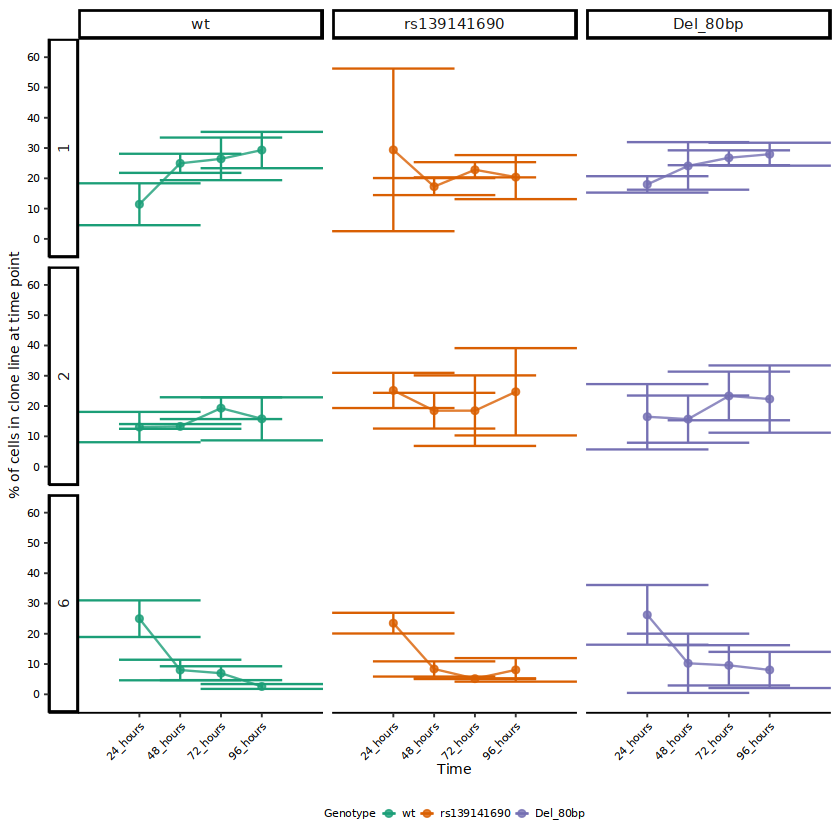

In [84]:
 #### graph parameters ----
  
  DEBUG <- 1
  
  vector_fill<-brewer.pal(length(levels(Seurat_cluster_abundancies_subset_summarised$Genotype)),"Dark2")
  
  cat("vector_fill_0\n")
  cat(str(vector_fill))
  cat("\n")
  
  summary_perc<-unique(c(Seurat_cluster_abundancies_subset_summarised$Perc_max[!is.na(Seurat_cluster_abundancies_subset_summarised$Perc_max)],
                         Seurat_cluster_abundancies_subset_summarised$Perc_min[!is.na(Seurat_cluster_abundancies_subset_summarised$Perc_min)]))
  
  Max_perc<-max(summary_perc)
  Min_perc<-min(summary_perc)
  
  step<-round((Max_perc-Min_perc)/4,2)
  
  if(step == 0)
  {
    step<-0.1
  }
  
  if(DEBUG == 1)
  {
    cat("Max_perc:\t")
    cat(sprintf(as.character(Max_perc)))
    cat("\n")
    cat("Min_perc:\t")
    cat(sprintf(as.character(Min_perc)))
    cat("\n")
    cat("step:\t")
    cat(sprintf(as.character(step)))
    cat("\n")
  }
  
  breaks_perc<-unique(sort(c(Max_perc,seq(Min_perc,Max_perc, by=step))))
  breaks_perc<-unique(sort(seq(0,60,by=10)))
  
  labels_perc<-as.character(round(breaks_perc,1))
  labels_perc<-as.character(round(breaks_perc,0))
  
  
  if(DEBUG == 1)
  {
    cat("breaks_perc:\t")
    cat(sprintf(as.character(breaks_perc)))
    cat("\n")
    cat("labels_perc:\t")
    cat(sprintf(as.character(labels_perc)))
    cat("\n")
  }
  
 
  
  
  
  graph_perc<-ggplot(data=Seurat_cluster_abundancies_subset_summarised,
                     aes(x=time_point,
                         y=Perc))+   
    new_scale("color")+
    geom_line(aes(group=interaction(seurat_clusters,Genotype), 
                  color=Genotype), size=0.5, alpha=0.8)+
    geom_errorbar(aes(ymin=Perc-sd, ymax=Perc+sd,
                      group=interaction(seurat_clusters,Genotype), 
                      color=Genotype), width=3)+
    scale_color_manual(values=vector_fill, drop=F)+
    new_scale("fill")+
    new_scale("color")+
    geom_point(aes(group=interaction(seurat_clusters,Genotype), 
                   fill=Genotype, 
                   color=Genotype),
               size=1.5, shape=21, stroke=0.5,alpha=0.8)+
    scale_color_manual(values=vector_fill, drop=F)+
    scale_fill_manual(values=vector_fill, drop=F)+     
    scale_x_discrete(name="Time", expand = c(0.1, 0.1))+     
    scale_y_continuous(name="% of cells in clone line at time point",breaks=breaks_perc,labels=labels_perc, limits=c(breaks_perc[1],breaks_perc[length(breaks_perc)]), expand = c(0.1, 0.1))
  
  
  
  
  graph_perc <-graph_perc+
    theme_cowplot(font_size = 2,
                  font_family = "sans")+
    facet_grid(seurat_clusters ~ Genotype, scales='free_x', space='free_x', switch="y")+
    theme( strip.background = element_blank(),
           strip.placement = "outside",
           strip.text = element_text(size=5,color="black", family="sans"),
           panel.spacing = unit(0.2, "lines"),
           panel.background=element_rect(fill="white"),
           panel.border=element_rect(colour="white",size=0,5),
           panel.grid.major = element_blank(),
           panel.grid.minor = element_blank())+
    theme_classic()+
    theme(axis.title=element_blank(),
          axis.title.y=element_text(size=8,color="black", family="sans"),
          axis.title.x=element_text(size=8,color="black", family="sans"),
          axis.text.y=element_text(size=6,color="black", family="sans"),
          axis.text.x=element_text(angle=45, vjust=1,hjust=1,size=6,color="black", family="sans"),
          axis.line.x = element_line(size = 0.4),
          axis.ticks.x = element_line(size = 0.4),
          axis.ticks.y = element_line(size = 0.4),
          axis.line.y = element_line(size = 0.4))+
    theme(legend.title = element_text(size=6),
          legend.text = element_text(size=6),
          legend.key.size = unit(0.35, 'cm'), #change legend key size
          legend.key.height = unit(0.35, 'cm'), #change legend key height
          legend.key.width = unit(0.35, 'cm'), #change legend key width
          legend.position="bottom")+
    guides(fill=guide_legend(nrow=2,byrow=TRUE))+
    ggeasy::easy_center_title()
  
  
  
 graph_perc
  
  

vector_fill_0
 chr [1:3] "#1B9E77" "#D95F02" "#7570B3"

Max_perc:	38.3458310191646
Min_perc:	2.32377119281006
step:	9.01
breaks_perc:	0 10 20 30 40 50 60
labels_perc:	0 10 20 30 40 50 60


Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


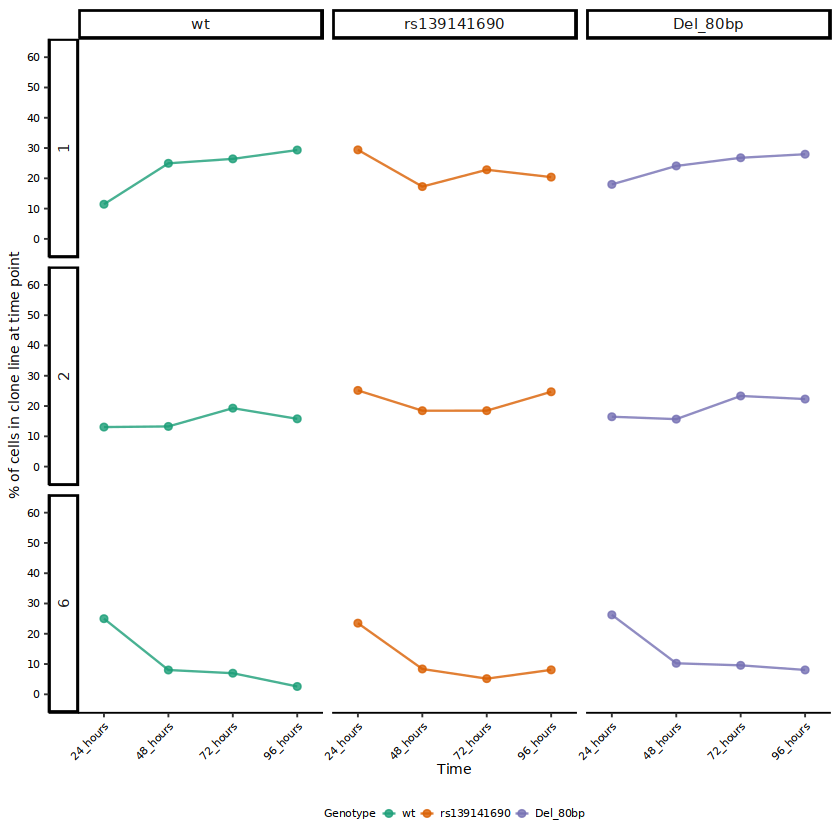

In [85]:
 #### graph parameters ----
  
  DEBUG <- 1
  
  vector_fill<-brewer.pal(length(levels(Seurat_cluster_abundancies_subset_summarised$Genotype)),"Dark2")
  
  cat("vector_fill_0\n")
  cat(str(vector_fill))
  cat("\n")
  
  summary_perc<-unique(c(Seurat_cluster_abundancies_subset_summarised$Perc_max[!is.na(Seurat_cluster_abundancies_subset_summarised$Perc_max)],
                         Seurat_cluster_abundancies_subset_summarised$Perc_min[!is.na(Seurat_cluster_abundancies_subset_summarised$Perc_min)]))
  
  Max_perc<-max(summary_perc)
  Min_perc<-min(summary_perc)
  
  step<-round((Max_perc-Min_perc)/4,2)
  
  if(step == 0)
  {
    step<-0.1
  }
  
  if(DEBUG == 1)
  {
    cat("Max_perc:\t")
    cat(sprintf(as.character(Max_perc)))
    cat("\n")
    cat("Min_perc:\t")
    cat(sprintf(as.character(Min_perc)))
    cat("\n")
    cat("step:\t")
    cat(sprintf(as.character(step)))
    cat("\n")
  }
  
  breaks_perc<-unique(sort(c(Max_perc,seq(Min_perc,Max_perc, by=step))))
  breaks_perc<-unique(sort(seq(0,60,by=10)))
  
  labels_perc<-as.character(round(breaks_perc,1))
  labels_perc<-as.character(round(breaks_perc,0))
  
  
  if(DEBUG == 1)
  {
    cat("breaks_perc:\t")
    cat(sprintf(as.character(breaks_perc)))
    cat("\n")
    cat("labels_perc:\t")
    cat(sprintf(as.character(labels_perc)))
    cat("\n")
  }
  
 
  
  
  
  graph_perc<-ggplot(data=Seurat_cluster_abundancies_subset_summarised,
                     aes(x=time_point,
                         y=Perc))+   
    new_scale("color")+
    geom_line(aes(group=interaction(seurat_clusters,Genotype), 
                  color=Genotype), size=0.5, alpha=0.8)+   
    scale_color_manual(values=vector_fill, drop=F)+
    new_scale("fill")+
    new_scale("color")+
    geom_point(aes(group=interaction(seurat_clusters,Genotype), 
                   fill=Genotype, 
                   color=Genotype),
               size=1.5, shape=21, stroke=0.5,alpha=0.8)+
    scale_color_manual(values=vector_fill, drop=F)+
    scale_fill_manual(values=vector_fill, drop=F)+     
    scale_x_discrete(name="Time", expand = c(0.1, 0.1))+     
    scale_y_continuous(name="% of cells in clone line at time point",breaks=breaks_perc,labels=labels_perc, limits=c(breaks_perc[1],breaks_perc[length(breaks_perc)]), expand = c(0.1, 0.1))
  
  
  
  
  graph_perc <-graph_perc+
    theme_cowplot(font_size = 2,
                  font_family = "sans")+
    facet_grid(seurat_clusters ~ Genotype, scales='free_x', space='free_x', switch="y")+
    theme( strip.background = element_blank(),
           strip.placement = "outside",
           strip.text = element_text(size=5,color="black", family="sans"),
           panel.spacing = unit(0.2, "lines"),
           panel.background=element_rect(fill="white"),
           panel.border=element_rect(colour="white",size=0,5),
           panel.grid.major = element_blank(),
           panel.grid.minor = element_blank())+
    theme_classic()+
    theme(axis.title=element_blank(),
          axis.title.y=element_text(size=8,color="black", family="sans"),
          axis.title.x=element_text(size=8,color="black", family="sans"),
          axis.text.y=element_text(size=6,color="black", family="sans"),
          axis.text.x=element_text(angle=45, vjust=1,hjust=1,size=6,color="black", family="sans"),
          axis.line.x = element_line(size = 0.4),
          axis.ticks.x = element_line(size = 0.4),
          axis.ticks.y = element_line(size = 0.4),
          axis.line.y = element_line(size = 0.4))+
    theme(legend.title = element_text(size=6),
          legend.text = element_text(size=6),
          legend.key.size = unit(0.35, 'cm'), #change legend key size
          legend.key.height = unit(0.35, 'cm'), #change legend key height
          legend.key.width = unit(0.35, 'cm'), #change legend key width
          legend.position="bottom")+
    guides(fill=guide_legend(nrow=2,byrow=TRUE))+
    ggeasy::easy_center_title()
  
  
  
 graph_perc
  
  

In [86]:
setwd(path_graphs)
    
    
svgname<-paste(paste("Panel_S5_D_line_plot","seurat_clusters_dynamics", sep='_'),".svg",sep='')
svglite(svgname, width = 4, height = 4)
print(graph_perc)
dev.off()

png 
  2